In [39]:
#importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [40]:
#importing data as a data frame
df=pd.read_csv("D:\\Level 3\\Semester 2\\ST-3011 Statistical Programming\\Data sets\\indian liver rename.csv")

In [41]:
#view first few records
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [42]:
#check for duplicate values
df.duplicated().any()
#removing duplicates only keeping first occurance
df=df.drop_duplicates(keep='first')
df.duplicated().any()

False

In [43]:
#check for missing values
df.isna().sum()
#imputing missing values from median
df['A/G Ratio']=df['A/G Ratio'].fillna(df['A/G Ratio'].median())
df.isna().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    0
Selector     0
dtype: int64

In [44]:
#Encode 1 as having disease and 0 as not having disease for a new column disease
df['Selector'].value_counts()
df['Disease'] = df['Selector'].map({2:0,1:1}) 
df=df.drop(columns=['Selector'])
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


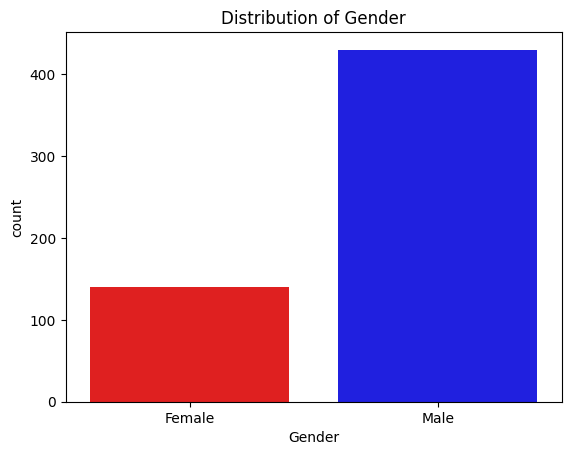

In [45]:
#barchart of gender
import seaborn as sns
sns.countplot(x='Gender', data=df,hue="Gender",palette={'Male': '#0000FF', 'Female': '#FF0000'})
plt.title("Distribution of Gender")
plt.show()

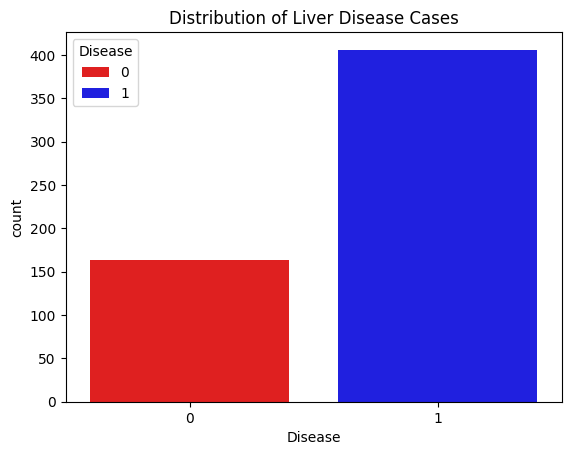

In [46]:
#barchart of disease
df['Disease'] = df['Disease'].astype('category')
import seaborn as sns
sns.countplot(x='Disease', data=df,hue="Disease",palette={1: '#0000FF', 0: '#FF0000'})
plt.title("Distribution of Liver Disease Cases")
plt.show()

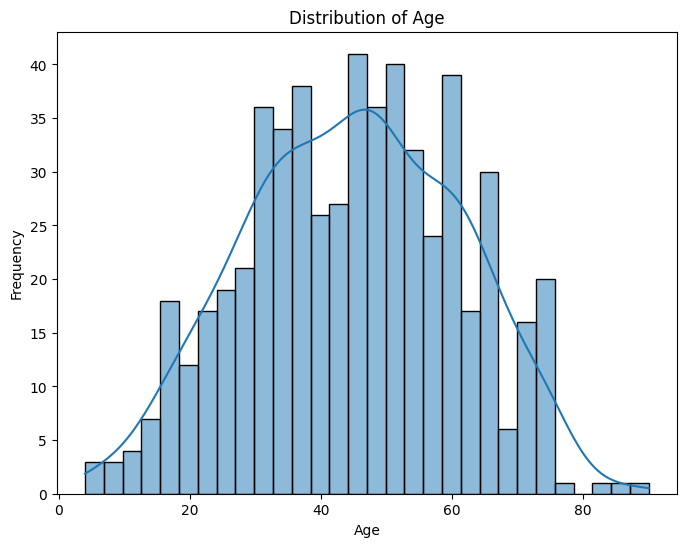

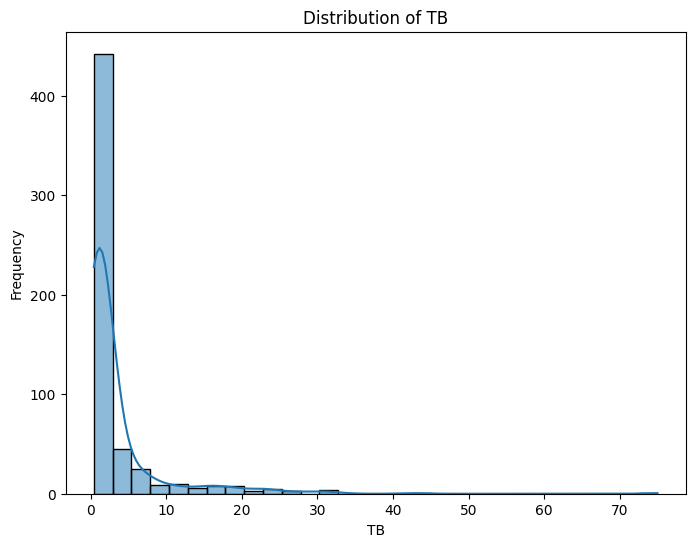

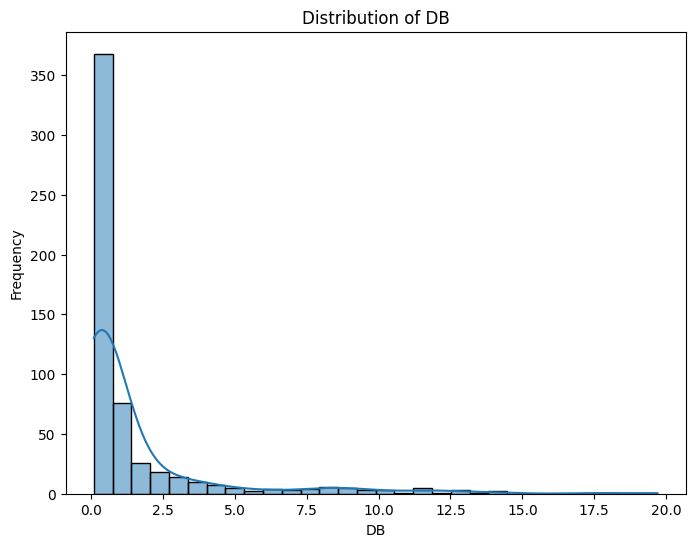

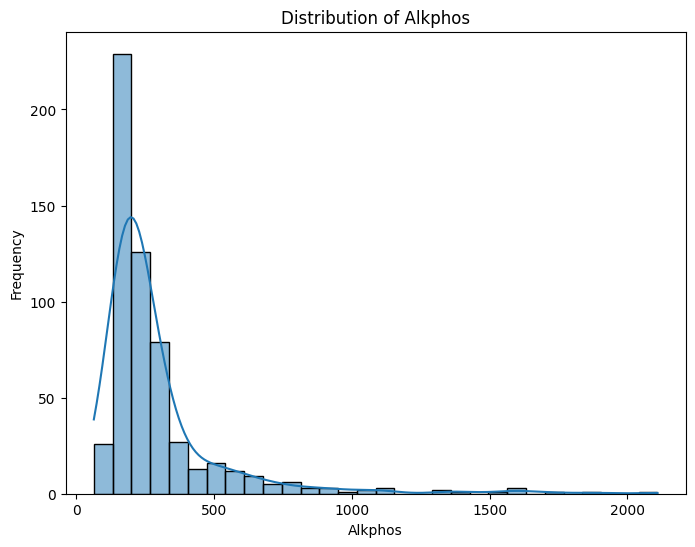

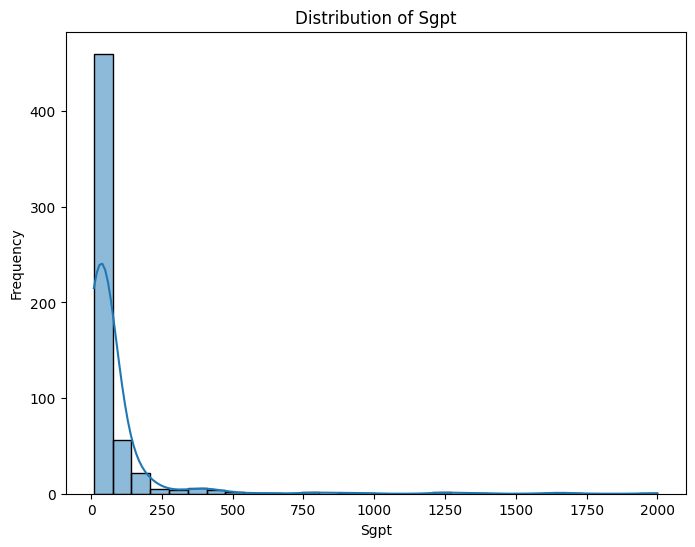

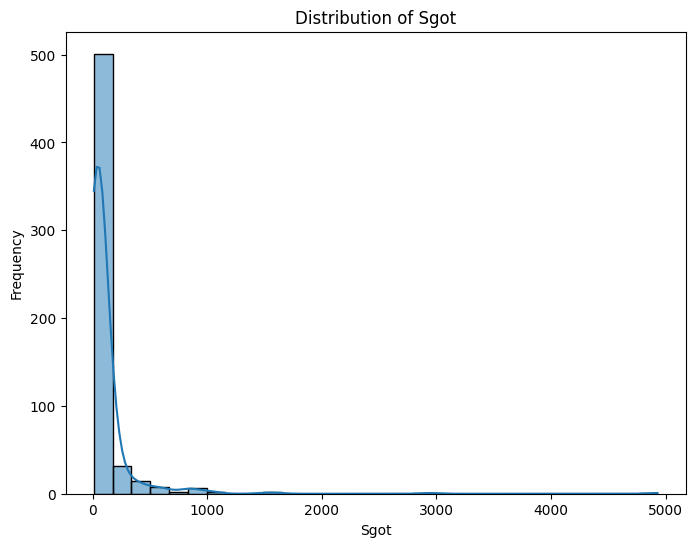

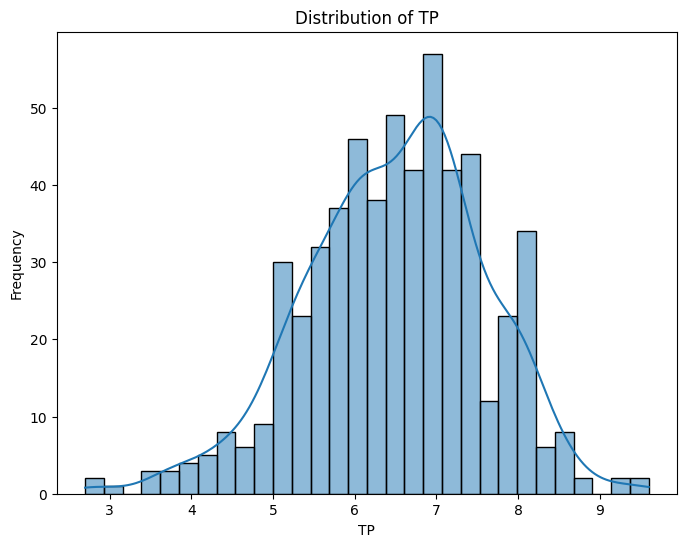

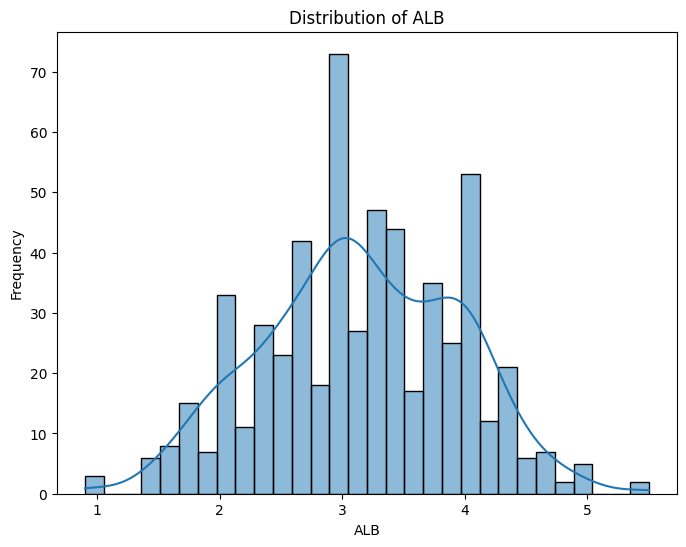

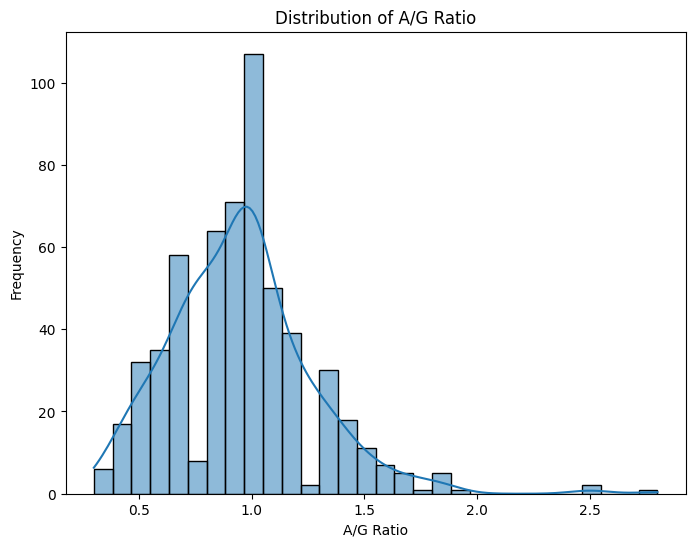

In [47]:
#plotting histograms for continous variables
for column in ['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio']:
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.histplot(df[column], kde=True, bins=30)  # Create histogram with KDE
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)  # Label the x-axis
    plt.ylabel("Frequency")  # Label the y-axis
    plt.show() 

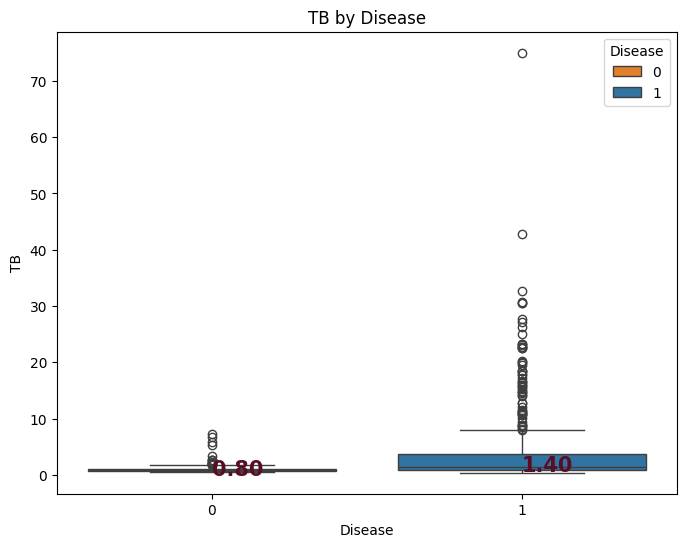

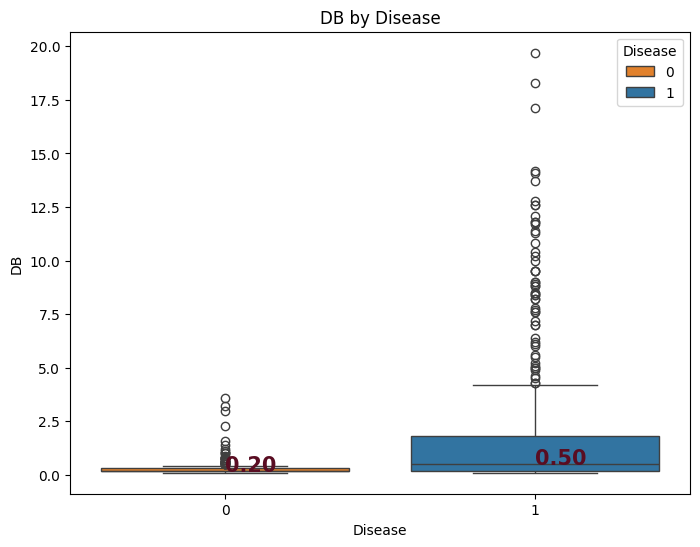

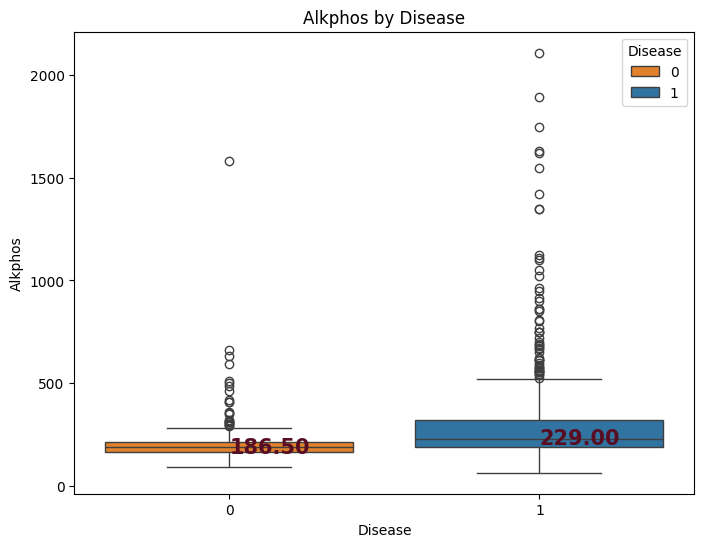

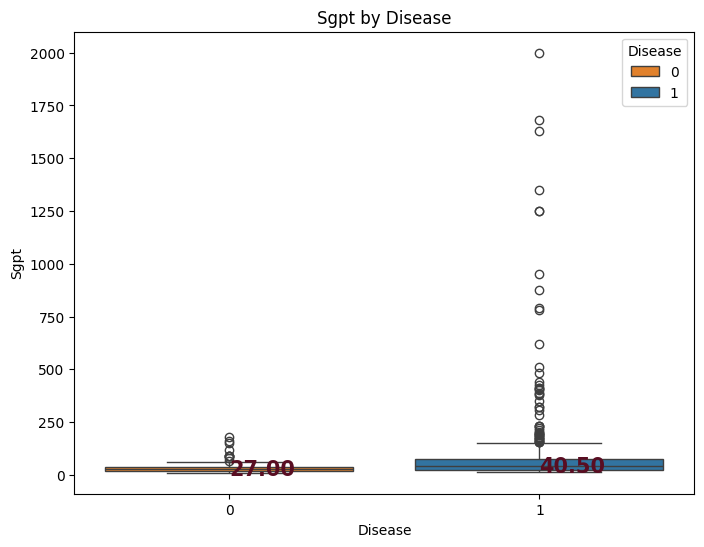

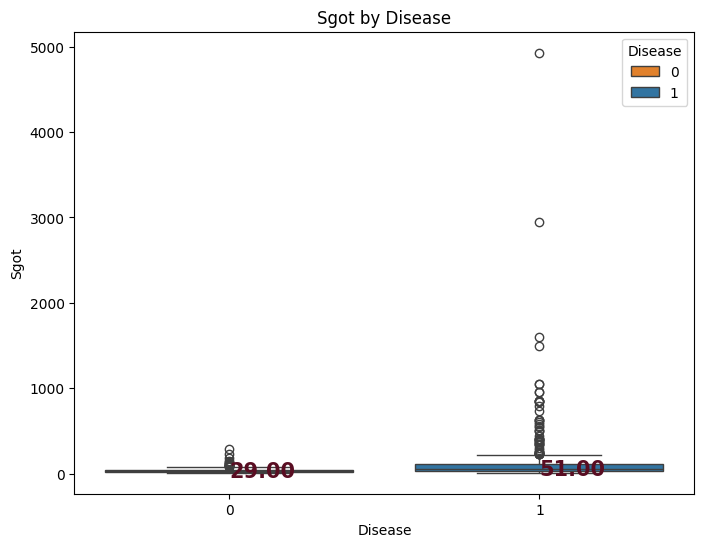

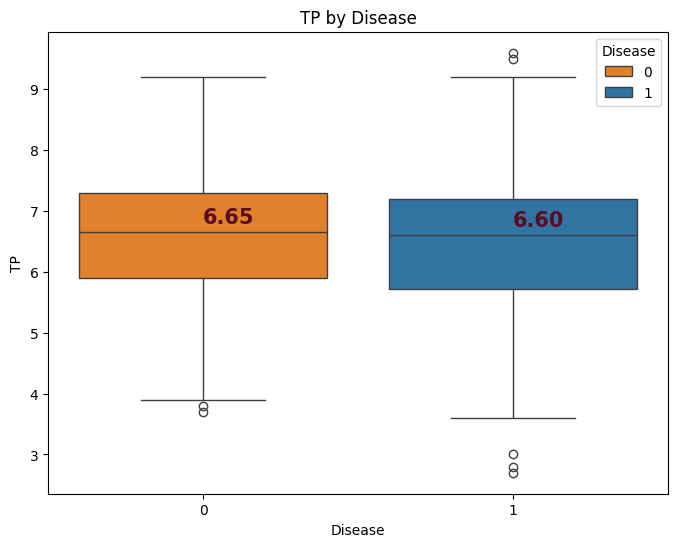

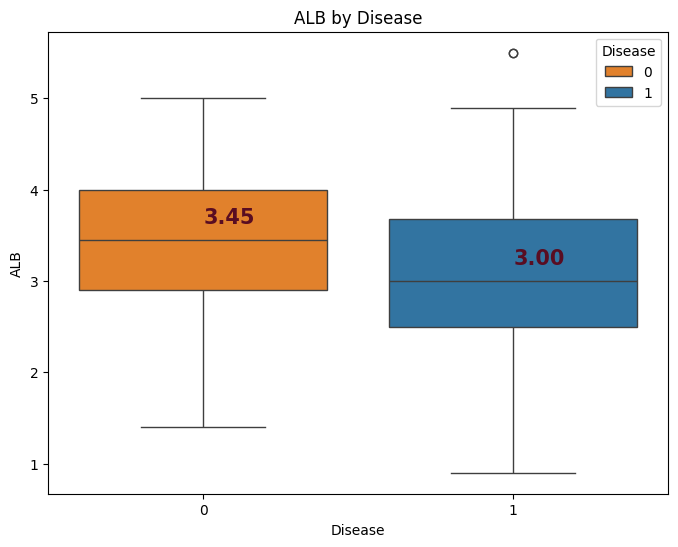

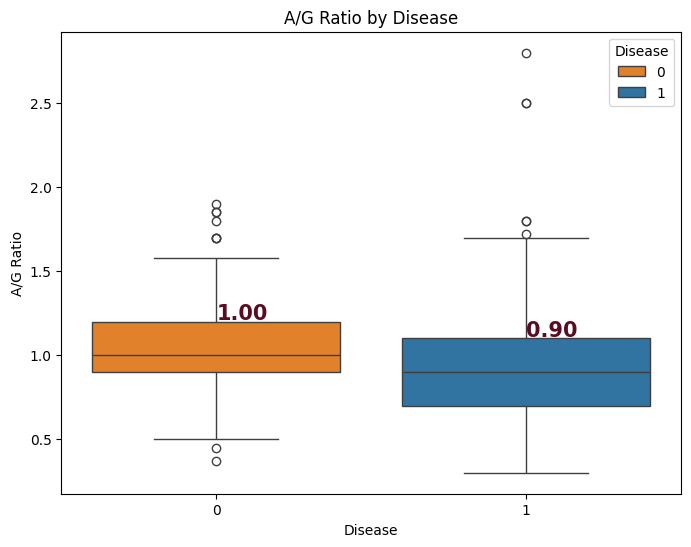

In [48]:
for column in ['TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio']:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x='Disease', y=column, data=df, hue="Disease", palette={1: '#1f77b4', 0: '#ff7f0e'})
    
    # Calculate medians for the column
    medians = df.groupby('Disease', observed=False)[column].median()
    
    # Annotate the medians on the boxplot
    for i, (disease, median) in enumerate(medians.items()):
        ax.text(i, median + 0.25, f'{median:.2f}', ha='left', va='center', color='#590d22', fontsize=15, fontweight='bold')
    
    plt.title(f"{column} by Disease")
    plt.show()

<Axes: title={'center': 'Pearson Correlation of liver disease Features'}>

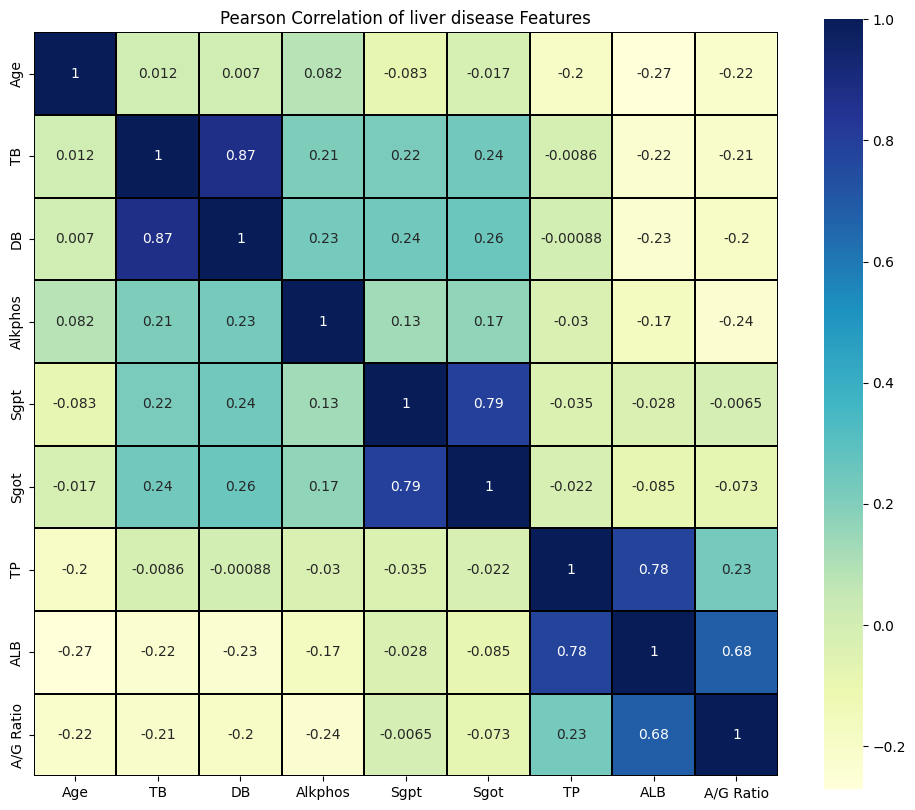

In [49]:
data_num_features=df.drop(['Gender','Disease'],axis=1)
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of liver disease Features')
# Draw the heatmap using seaborn
sns.heatmap(data_num_features.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)

In [50]:
#advanced analysis
#extracting feature variables
x=df.drop(columns=['Disease'])
x['Gender'] = x['Gender'].map({'Male': 1, 'Female': 0})
x.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [51]:
#extracting target variable
y=df["Disease"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Disease, dtype: category
Categories (2, int64): [0, 1]

In [52]:
import statsmodels.api as sm
x = sm.add_constant(x)
x.head()

,const,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,1.0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,1.0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,1.0,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,1.0,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,1.0,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [53]:
model = sm.Logit(y, x).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.491096
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Disease   No. Observations:                  570
Model:                          Logit   Df Residuals:                      559
Method:                           MLE   Df Model:                           10
Date:                Fri, 31 Jan 2025   Pseudo R-squ.:                  0.1816
Time:                        22:23:24   Log-Likelihood:                -279.92
converged:                       True   LL-Null:                       -342.06
Covariance Type:            nonrobust   LLR p-value:                 6.892e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0821      1.283     -2.402      0.016      -5.598      -0.567
Age            0.0181      0.

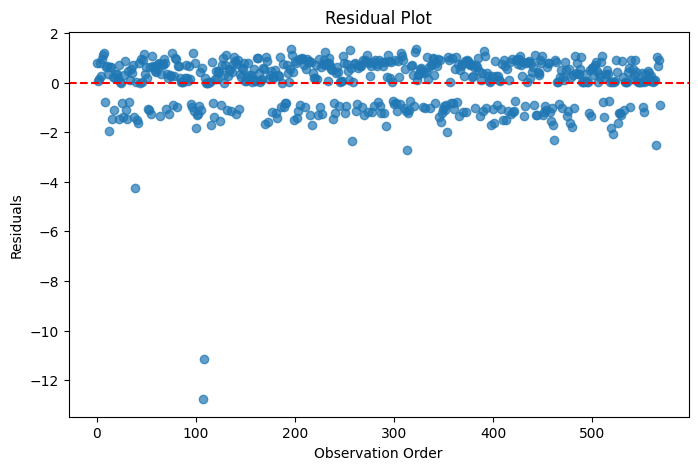

In [54]:
# Get Pearson residuals 
residuals = model.resid_pearson  

# Plot residuals against observation order
plt.figure(figsize=(8, 5))
plt.scatter(range(len(residuals)), residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel("Observation Order")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [55]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Initialize the oversampler
over_sampler = RandomOverSampler(random_state=42)

# Apply oversampling to your data
x_resampled, y_resampled = over_sampler.fit_resample(x, y)

# Check the new class distribution
print(f"Original class distribution: {Counter(y)}")
print(f"Resampled class distribution: {Counter(y_resampled)}")

Original class distribution: Counter({1: 406, 0: 164})
Resampled class distribution: Counter({1: 406, 0: 406})


In [56]:
x_resampled = sm.add_constant(x_resampled)

In [57]:
model_2 = sm.Logit(y_resampled, x_resampled).fit()

print(model_2.summary())

Optimization terminated successfully.
         Current function value: 0.537440
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Disease   No. Observations:                  812
Model:                          Logit   Df Residuals:                      801
Method:                           MLE   Df Model:                           10
Date:                Fri, 31 Jan 2025   Pseudo R-squ.:                  0.2246
Time:                        22:23:37   Log-Likelihood:                -436.40
converged:                       True   LL-Null:                       -562.84
Covariance Type:            nonrobust   LLR p-value:                 1.354e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1863      1.008     -4.154      0.000      -6.162      -2.211
Age            0.0185      0.

In [58]:
import scipy.stats as stats

# Chi-square critical value for alpha = 0.05 and 10 degrees of freedom
alpha = 0.05
degrees_of_freedom = 10

chi_square_critical = stats.chi2.ppf(1 - alpha, degrees_of_freedom)

print(f"Chi-Square Critical Value (α=0.05, df=10): {chi_square_critical}")

Chi-Square Critical Value (α=0.05, df=10): 18.307038053275146


In [59]:
# Deviance is calculated as -2 times the log-likelihood
deviance = -2 * model.llf

print(f"Deviance of the fitted model: {deviance}")

Deviance of the fitted model: 559.8489048017177


In [60]:
# Deviance is calculated as -2 times the log-likelihood
deviance = -2 * model_2.llf

print(f"Deviance of the fitted model: {deviance}")

Deviance of the fitted model: 872.8028250981274


In [61]:
#   H0: model fits data well
#   H1: model does not fit data well

#   Since test staistic value=559.86> critical value = 18.31, we reject H0.
# Therefore, we can conclude that we do not have enough evidence to say that the model fits data well


In [62]:
influence = model.get_influence()
cooks_distance = influence.cooks_distance[0]
#print(cooks_distance) 

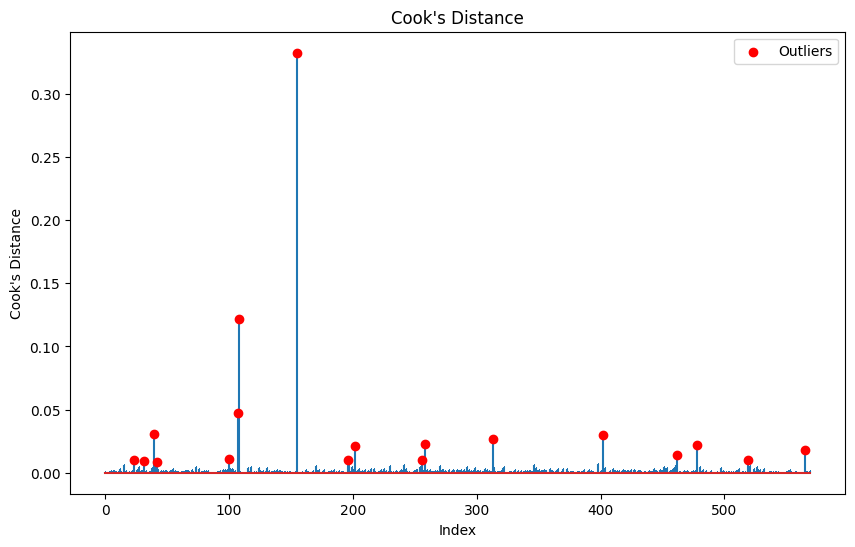

Outliers (indices with Cook's Distance > threshold): [ 23  31  39  42 100 107 108 155 196 202 256 258 313 402 462 478 519 565]
Number of outliers: 18


In [63]:
# Calculate the threshold for Cook's Distance using the formula 4/(n - p - 1)
n = x.shape[0]  # Number of observations
p = x.shape[1] - 1  # Number of predictors (excluding the intercept term)
threshold = 4 / (n - p - 1)

# Plot Cook's Distance
plt.figure(figsize=(10,6))
plt.stem(np.arange(len(cooks_distance)), cooks_distance, markerfmt=",")
plt.title('Cook\'s Distance')
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')

# Mark the outliers (observations with Cook's Distance greater than the threshold)
outliers = np.where(cooks_distance > threshold)[0]
plt.scatter(outliers, cooks_distance[outliers], color='red', label='Outliers', zorder=5)

# Show the plot with the outliers marked
plt.legend()
plt.show()

# Print the indices and the count of the outliers
print("Outliers (indices with Cook's Distance > threshold):", outliers)
print("Number of outliers:", len(outliers))

In [64]:
# Residual Deviance (calculated from log-likelihood)
log_likelihood_model = model.llf  # Log-likelihood of the fitted model
log_likelihood_null = model.llnull  # Log-likelihood of the null model
residual_deviance = -2 * (log_likelihood_model - log_likelihood_null)

print(f"Residual Deviance: {residual_deviance}")


Residual Deviance: -124.26159264050216


In [65]:
import scipy.stats as stats

# Chi-square critical value for alpha = 0.05 and 10 degrees of freedom
alpha = 0.05
degrees_of_freedom = 10

chi_square_critical = stats.chi2.ppf(1 - alpha, degrees_of_freedom)

print(f"Chi-Square Critical Value (α=0.05, df=10): {chi_square_critical}")

Chi-Square Critical Value (α=0.05, df=10): 18.307038053275146


In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Remove intercept if present
x_no_intercept = x.iloc[:, 1:]  # Assuming the first column is the intercept

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = x_no_intercept.columns
vif_data['VIF'] = [variance_inflation_factor(x_no_intercept.values, i) for i in range(x_no_intercept.shape[1])]

# Display the results
print(vif_data)

     Feature         VIF
0        Age    7.765573
1     Gender    4.050646
2         TB    5.453793
3         DB    5.718216
4    Alkphos    2.635041
5       Sgpt    3.302523
6       Sgot    3.180302
7         TP  101.622408
8        ALB  132.516656
9  A/G Ratio   25.455651


In [67]:
X=x.copy()
X.drop(columns=['const'], inplace=True)
X.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [68]:
Y=y.copy()
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Disease, dtype: category
Categories (2, int64): [0, 1]

In [69]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(X)

# Transform the features (no need to use `.values`)
X_scaled = scaler.transform(X)

# View the scaled features for the first instance
print(X_scaled[0])
X_scaled.shape

[ 1.24174059 -1.75254916 -0.41864741 -0.4937018  -0.42742097 -0.35148206
 -0.31442779  0.27928958  0.18973749 -0.15088921]


(570, 10)

In [70]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Initialize the oversampler
over_sampler = RandomOverSampler(random_state=42)

# Apply oversampling to your data
X_resampled, Y_resampled = over_sampler.fit_resample(X_scaled, Y)

# Check the new class distribution
print(f"Original class distribution: {Counter(Y)}")
print(f"Resampled class distribution: {Counter(Y_resampled)}")

Original class distribution: Counter({1: 406, 0: 164})
Resampled class distribution: Counter({1: 406, 0: 406})


In [71]:
from sklearn.model_selection import train_test_split
# Split data into train and test
X_train_scaled, X_test_scaled, y_train, y_test =train_test_split(X_resampled, Y_resampled, train_size=.7, random_state=25)
# Check the splits are correct
print(f"Train size: {round(len(X_train_scaled) / len(X_resampled) * 100)}% \n\
Test size: {round(len(X_test_scaled) / len(X_resampled) * 100)}%")
print(y_train.value_counts())

Train size: 70% 
Test size: 30%
Disease
0    286
1    282
Name: count, dtype: int64


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Instnatiating the models
logistic_regression = LogisticRegression()
svm = SVC()
tree = DecisionTreeClassifier()
# Training the models
logistic_regression.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
tree.fit(X_train_scaled, y_train)
# Making predictions with each model
log_reg_preds = logistic_regression.predict(X_test_scaled)
svm_preds = svm.predict(X_test_scaled)
tree_preds = tree.predict(X_test_scaled)

In [92]:
from sklearn.metrics import classification_report
# Store model predictions in a dictionary, easier to iterate througheach model and print the results.
model_preds = {
"Logistic Regression": log_reg_preds,
"Support Vector Machine": svm_preds,
"Decision Tree": tree_preds
}
for model, preds in model_preds.items():
    print(f"{model} Results:\n{classification_report(y_test, preds)}",
    sep="\n\n")

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       120
           1       0.87      0.63      0.73       124

    accuracy                           0.76       244
   macro avg       0.78      0.76      0.76       244
weighted avg       0.79      0.76      0.76       244

Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       120
           1       0.87      0.57      0.69       124

    accuracy                           0.74       244
   macro avg       0.77      0.74      0.73       244
weighted avg       0.77      0.74      0.73       244

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       120
           1       0.87      0.72      0.79       124

    accuracy                           0.80       244
   macro avg       0.81      0.80      0.80 

In [79]:
# use feature names from the original dataset
feature_names = list(X.columns)  

# Get logistic regression coefficients
logistic_coefficients = logistic_regression.coef_[0]  

# Print feature names with their corresponding coefficients
for feature, coef in zip(feature_names, logistic_coefficients):
    print(f"{feature}: {coef}")

Age: 0.30981115612023313
Gender: 0.012361407952572788
TB: 0.5626443521206055
DB: 1.0800189748701678
Alkphos: 0.42385129664823923
Sgpt: 1.4789905787948032
Sgot: 0.6989653906039969
TP: 0.4715329490738767
ALB: -0.574964022813502
A/G Ratio: 0.19897586476059806


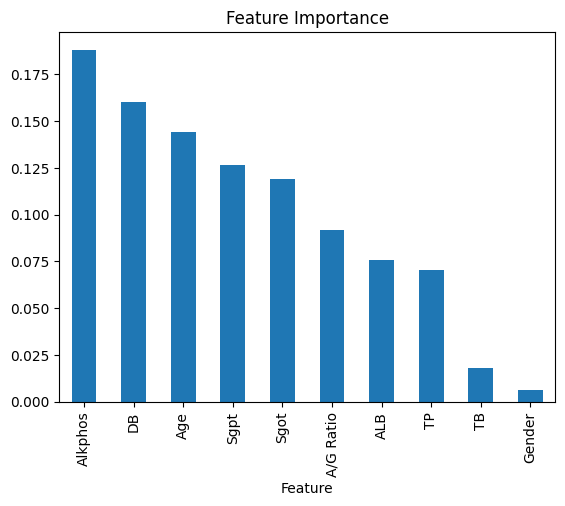

     Feature  Importance
4    Alkphos    0.188253
3         DB    0.160212
0        Age    0.144131
5       Sgpt    0.126292
6       Sgot    0.119125
9  A/G Ratio    0.091994
8        ALB    0.075539
7         TP    0.070390
2         TB    0.017802
1     Gender    0.006260


In [88]:
# Get feature importances
feature_importances = tree.feature_importances_

# Create a DataFrame for easy interpretation
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, title='Feature Importance')
plt.show()

print(importance_df)

In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, svm_preds)
print(cm)

[[109  11]
 [ 53  71]]


In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight


X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=25)


class_weights = compute_class_weight('balanced', classes=np.unique(Y_resampled), y=Y_resampled)
class_weight_dict = dict(zip(np.unique(Y_resampled), class_weights))

rf_model = RandomForestClassifier(n_estimators=100, class_weight=class_weight_dict, random_state=25)
rf_model.fit(X_train, Y_train)

Y_pred = rf_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Confusion Matrix:
[[109  11]
 [ 26  98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       120
           1       0.90      0.79      0.84       124

    accuracy                           0.85       244
   macro avg       0.85      0.85      0.85       244
weighted avg       0.85      0.85      0.85       244



In [91]:
# Get feature importance
feature_importances = rf_model.feature_importances_

# Print feature importance
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Age: 0.11430458967659143
Gender: 0.016468849808550803
TB: 0.10308681812792081
DB: 0.10429704440464645
Alkphos: 0.1565069658821673
Sgpt: 0.12934118306787487
Sgot: 0.1303495126043313
TP: 0.08158661211041936
ALB: 0.08879345363031926
A/G Ratio: 0.07526497068717851


In [76]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2%}")

# Display detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

XGBoost Accuracy: 83.20%

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       120
           1       0.87      0.79      0.83       124

    accuracy                           0.83       244
   macro avg       0.83      0.83      0.83       244
weighted avg       0.83      0.83      0.83       244

